<a href="https://colab.research.google.com/github/AndrewArnett/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/U4_S2_M2_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

In [17]:
def load_quickdraw10(path):
  data = np.load('quickdraw10.npz')
  X = data['arr_0']
  y = data['arr_1']
  X = X/255
  X, y = shuffle(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=23)


  return X_train, y_train, X_test, y_test

In [18]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 784)
(80000,)
(20000, 784)
(20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [20]:
from tensorflow.keras.optimizers import SGD

In [21]:
##### Your Code Here #####

def create_model(lr, opt):

  opt = SGD()

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')
      ]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [24]:
model_8 = create_model(.01, SGD)
bt_8 = model_8.fit(X_train, y_train, epochs=8, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/8
10000/10000 [==============================] - 19s 2ms/step - loss: 0.8955 - accuracy: 0.7305 - val_loss: 0.7131 - val_accuracy: 0.7835
Epoch 2/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6493 - accuracy: 0.8061 - val_loss: 0.6194 - val_accuracy: 0.8146
Epoch 3/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5802 - accuracy: 0.8259 - val_loss: 0.5707 - val_accuracy: 0.8269
Epoch 4/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5383 - accuracy: 0.8378 - val_loss: 0.5472 - val_accuracy: 0.8357
Epoch 5/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5113 - accuracy: 0.8458 - val_loss: 0.5311 - val_accuracy: 0.8429
Epoch 6/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4922 - accuracy: 0.8522 - val_loss: 0.5279 - val_accuracy: 0.8439
Epoch 7/8
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4765 - accuracy: 0.8565 - val_loss: 0.5151 -

In [25]:
model_16 = create_model(.01, SGD)
bt_16 = model_16.fit(X_train, y_train, epochs=8, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.9863 - accuracy: 0.7025 - val_loss: 0.7747 - val_accuracy: 0.7695
Epoch 2/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.7308 - accuracy: 0.7851 - val_loss: 0.6815 - val_accuracy: 0.8003
Epoch 3/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.6577 - accuracy: 0.8054 - val_loss: 0.6261 - val_accuracy: 0.8140
Epoch 4/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.6091 - accuracy: 0.8193 - val_loss: 0.6136 - val_accuracy: 0.8185
Epoch 5/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.5763 - accuracy: 0.8286 - val_loss: 0.5794 - val_accuracy: 0.8286
Epoch 6/8
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5502 - accuracy: 0.8357 - val_loss: 0.5590 - val_accuracy: 0.8346
Epoch 7/8
5000/5000 [==============================] - 9s 2ms/step - loss: 0.5306 - accuracy: 0.8416 - val_loss: 0.5542 - val_accuracy: 0.836

In [26]:
model_32 = create_model(.01, SGD)
bt_32 = model_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1601 - accuracy: 0.6308 - val_loss: 0.8467 - val_accuracy: 0.7512
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8000 - accuracy: 0.7630 - val_loss: 0.7499 - val_accuracy: 0.7796
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7256 - accuracy: 0.7863 - val_loss: 0.6999 - val_accuracy: 0.7951
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6769 - accuracy: 0.8006 - val_loss: 0.6536 - val_accuracy: 0.8091
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6398 - accuracy: 0.8119 - val_loss: 0.6283 - val_accuracy: 0.8181
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6108 - accuracy: 0.8197 - val_loss: 0.6034 - val_accuracy: 0.8242
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5873 - accuracy: 0.8263 - val_loss: 0.6108 - val_accuracy: 0.8191

In [27]:
model_64 = create_model(.01, SGD)
bt_64 = model_64.fit(X_train, y_train, epochs=8, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/8
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3319 - accuracy: 0.5896 - val_loss: 0.9557 - val_accuracy: 0.7181
Epoch 2/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.9063 - accuracy: 0.7314 - val_loss: 0.8474 - val_accuracy: 0.7526
Epoch 3/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.8310 - accuracy: 0.7565 - val_loss: 0.7933 - val_accuracy: 0.7703
Epoch 4/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.7857 - accuracy: 0.7712 - val_loss: 0.7647 - val_accuracy: 0.7779
Epoch 5/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.7516 - accuracy: 0.7821 - val_loss: 0.7326 - val_accuracy: 0.7890
Epoch 6/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.7240 - accuracy: 0.7900 - val_loss: 0.7081 - val_accuracy: 0.7959
Epoch 7/8
1250/1250 [==============================] - 2s 2ms/step - loss: 0.7000 - accuracy: 0.7971 - val_loss: 0.6863 - val_accuracy: 0.8019

In [28]:
model_128 =create_model(.01, SGD)
bt_128 = model_128.fit(X_train, y_train, epochs=8, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/8
625/625 [==============================] - 1s 2ms/step - loss: 1.6616 - accuracy: 0.4630 - val_loss: 1.2240 - val_accuracy: 0.6241
Epoch 2/8
625/625 [==============================] - 1s 2ms/step - loss: 1.0837 - accuracy: 0.6691 - val_loss: 0.9666 - val_accuracy: 0.7107
Epoch 3/8
625/625 [==============================] - 1s 2ms/step - loss: 0.9218 - accuracy: 0.7234 - val_loss: 0.8685 - val_accuracy: 0.7403
Epoch 4/8
625/625 [==============================] - 1s 2ms/step - loss: 0.8532 - accuracy: 0.7448 - val_loss: 0.8234 - val_accuracy: 0.7568
Epoch 5/8
625/625 [==============================] - 1s 2ms/step - loss: 0.8134 - accuracy: 0.7593 - val_loss: 0.7903 - val_accuracy: 0.7687
Epoch 6/8
625/625 [==============================] - 1s 2ms/step - loss: 0.7845 - accuracy: 0.7696 - val_loss: 0.7662 - val_accuracy: 0.7760
Epoch 7/8
625/625 [==============================] - 1s 2ms/step - loss: 0.7612 - accuracy: 0.7772 - val_loss: 0.7450 - val_accuracy: 0.7836
Epoch 8/8
625

In [31]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_8, bt_16, bt_32, bt_64, bt_128], 
                       ["8_", "16_", "32_", "64_", "128_"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.895505,0.730488,0.713117,0.78345,0,8_
1,0.649309,0.806100,0.619376,0.81460,1,8_
2,0.580166,0.825888,0.570724,0.82690,2,8_
3,0.538297,0.837850,0.547228,0.83570,3,8_
4,0.511316,0.845825,0.531062,0.84295,4,8_


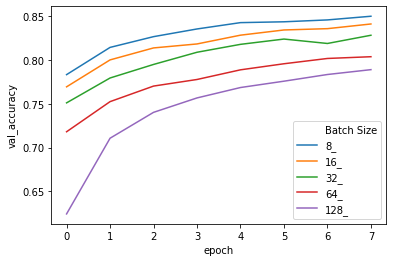

In [32]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

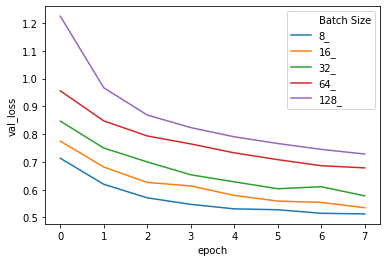

In [33]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [34]:
lr_one = create_model(1, SGD).fit(X_train, y_train,
                                  epochs=8,
                                  validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1604 - accuracy: 0.6398 - val_loss: 0.8339 - val_accuracy: 0.7575
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7945 - accuracy: 0.7662 - val_loss: 0.7394 - val_accuracy: 0.7865
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7209 - accuracy: 0.7879 - val_loss: 0.6843 - val_accuracy: 0.8033
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6723 - accuracy: 0.8022 - val_loss: 0.6564 - val_accuracy: 0.8094
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6362 - accuracy: 0.8132 - val_loss: 0.6229 - val_accuracy: 0.8174
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6068 - accuracy: 0.8209 - val_loss: 0.6030 - val_accuracy: 0.8220
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5834 - accuracy: 0.8284 - val_loss: 0.5865 - val_accuracy: 0.8289

In [35]:
lr_1 = create_model(.1, SGD).fit(X_train, y_train,
                                  epochs=8,
                                  validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1183 - accuracy: 0.6551 - val_loss: 0.8273 - val_accuracy: 0.7552
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7880 - accuracy: 0.7683 - val_loss: 0.7313 - val_accuracy: 0.7875
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7130 - accuracy: 0.7908 - val_loss: 0.6764 - val_accuracy: 0.8029
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6650 - accuracy: 0.8060 - val_loss: 0.6414 - val_accuracy: 0.8123
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6287 - accuracy: 0.8161 - val_loss: 0.6139 - val_accuracy: 0.8195
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6010 - accuracy: 0.8240 - val_loss: 0.5952 - val_accuracy: 0.8249
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5788 - accuracy: 0.8294 - val_loss: 0.5789 - val_accuracy: 0.8309

In [36]:
lr_01 = create_model(.01, SGD).fit(X_train, y_train,
                                  epochs=8,
                                  validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1632 - accuracy: 0.6342 - val_loss: 0.8547 - val_accuracy: 0.7463
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8158 - accuracy: 0.7601 - val_loss: 0.7686 - val_accuracy: 0.7697
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7370 - accuracy: 0.7843 - val_loss: 0.7031 - val_accuracy: 0.7976
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6849 - accuracy: 0.7990 - val_loss: 0.6611 - val_accuracy: 0.8065
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6451 - accuracy: 0.8106 - val_loss: 0.6319 - val_accuracy: 0.8141
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6161 - accuracy: 0.8177 - val_loss: 0.6122 - val_accuracy: 0.8180
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5930 - accuracy: 0.8244 - val_loss: 0.5958 - val_accuracy: 0.8219

In [37]:
lr_001 = create_model(.001, SGD).fit(X_train, y_train,
                                  epochs=8,
                                  validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1727 - accuracy: 0.6328 - val_loss: 0.8478 - val_accuracy: 0.7506
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8004 - accuracy: 0.7631 - val_loss: 0.7463 - val_accuracy: 0.7830
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7251 - accuracy: 0.7871 - val_loss: 0.6930 - val_accuracy: 0.7969
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6790 - accuracy: 0.8009 - val_loss: 0.6651 - val_accuracy: 0.8042
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6435 - accuracy: 0.8099 - val_loss: 0.6280 - val_accuracy: 0.8167
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6137 - accuracy: 0.8185 - val_loss: 0.6106 - val_accuracy: 0.8199
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5907 - accuracy: 0.8255 - val_loss: 0.5963 - val_accuracy: 0.8239

In [38]:
lr_0001 = create_model(.0001, SGD).fit(X_train, y_train,
                                  epochs=8,
                                  validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1422 - accuracy: 0.6485 - val_loss: 0.8546 - val_accuracy: 0.7441
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8116 - accuracy: 0.7584 - val_loss: 0.7589 - val_accuracy: 0.7781
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7363 - accuracy: 0.7834 - val_loss: 0.7020 - val_accuracy: 0.7970
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6858 - accuracy: 0.7985 - val_loss: 0.6688 - val_accuracy: 0.8052
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6483 - accuracy: 0.8087 - val_loss: 0.6363 - val_accuracy: 0.8126
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6177 - accuracy: 0.8167 - val_loss: 0.6186 - val_accuracy: 0.8163
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5936 - accuracy: 0.8236 - val_loss: 0.6019 - val_accuracy: 0.8206

In [51]:
batch_sizes = []

for exp, result in zip([lr_one, lr_1, lr_01, lr_001, lr_0001], ["1_", ".1_", ".01_", ".001_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.160362,0.639775,0.833933,0.75750,0,1_
1,0.794548,0.766163,0.739383,0.78655,1,1_
2,0.720884,0.787950,0.684259,0.80335,2,1_
3,0.672303,0.802150,0.656438,0.80935,3,1_
4,0.636186,0.813163,0.622868,0.81745,4,1_


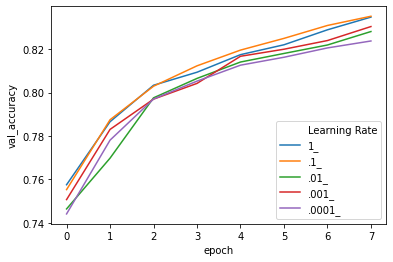

In [52]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

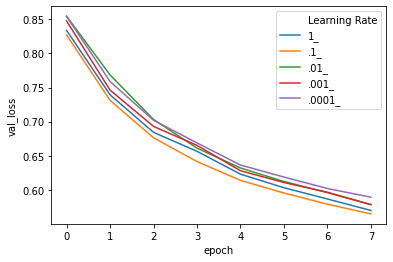

In [53]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [44]:
from tensorflow.keras.optimizers import Adadelta, Adagrad, Nadam, RMSprop, Adamax

In [46]:
adadelta_32 = create_model(.01, Adadelta)
adadelta_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1400 - accuracy: 0.6515 - val_loss: 0.8405 - val_accuracy: 0.7545
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8066 - accuracy: 0.7637 - val_loss: 0.7537 - val_accuracy: 0.7806
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7362 - accuracy: 0.7850 - val_loss: 0.7106 - val_accuracy: 0.7962
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6886 - accuracy: 0.7989 - val_loss: 0.6774 - val_accuracy: 0.8043
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6529 - accuracy: 0.8077 - val_loss: 0.6422 - val_accuracy: 0.8136
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6245 - accuracy: 0.8160 - val_loss: 0.6241 - val_accuracy: 0.8157
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6005 - accuracy: 0.8229 - val_loss: 0.6035 - val_accuracy: 0.8233

In [47]:
adagrad_32 = create_model(.01, Adagrad)
adagrad_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1768 - accuracy: 0.6310 - val_loss: 0.8583 - val_accuracy: 0.7488
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8037 - accuracy: 0.7631 - val_loss: 0.7486 - val_accuracy: 0.7822
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7194 - accuracy: 0.7897 - val_loss: 0.6805 - val_accuracy: 0.7992
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6648 - accuracy: 0.8051 - val_loss: 0.6510 - val_accuracy: 0.8076
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6275 - accuracy: 0.8142 - val_loss: 0.6176 - val_accuracy: 0.8155
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5987 - accuracy: 0.8222 - val_loss: 0.6114 - val_accuracy: 0.8185
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5777 - accuracy: 0.8285 - val_loss: 0.5831 - val_accuracy: 0.8277

In [48]:
nadam_32 = create_model(.01, Nadam)
nadam_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1691 - accuracy: 0.6416 - val_loss: 0.8500 - val_accuracy: 0.7459
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8071 - accuracy: 0.7632 - val_loss: 0.7592 - val_accuracy: 0.7794
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7365 - accuracy: 0.7848 - val_loss: 0.7035 - val_accuracy: 0.7951
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6844 - accuracy: 0.8002 - val_loss: 0.6586 - val_accuracy: 0.8077
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6435 - accuracy: 0.8106 - val_loss: 0.6304 - val_accuracy: 0.8184
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6117 - accuracy: 0.8204 - val_loss: 0.6085 - val_accuracy: 0.8219
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5854 - accuracy: 0.8285 - val_loss: 0.5862 - val_accuracy: 0.8285

In [49]:
rmsprop_32 = create_model(.01, RMSprop)
rmsprop_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1510 - accuracy: 0.6422 - val_loss: 0.8477 - val_accuracy: 0.7523
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8037 - accuracy: 0.7646 - val_loss: 0.7418 - val_accuracy: 0.7848
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7223 - accuracy: 0.7883 - val_loss: 0.6924 - val_accuracy: 0.7945
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6705 - accuracy: 0.8025 - val_loss: 0.6435 - val_accuracy: 0.8106
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6340 - accuracy: 0.8133 - val_loss: 0.6219 - val_accuracy: 0.8149
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6075 - accuracy: 0.8213 - val_loss: 0.5986 - val_accuracy: 0.8226
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5859 - accuracy: 0.8272 - val_loss: 0.5846 - val_accuracy: 0.8256

In [50]:
adamax_32 = create_model(.01, Adamax)
adamax_32.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1655 - accuracy: 0.6359 - val_loss: 0.8550 - val_accuracy: 0.7485
Epoch 2/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8108 - accuracy: 0.7622 - val_loss: 0.7562 - val_accuracy: 0.7807
Epoch 3/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7371 - accuracy: 0.7845 - val_loss: 0.6996 - val_accuracy: 0.7955
Epoch 4/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6871 - accuracy: 0.7995 - val_loss: 0.6612 - val_accuracy: 0.8062
Epoch 5/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6502 - accuracy: 0.8099 - val_loss: 0.6342 - val_accuracy: 0.8127
Epoch 6/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6212 - accuracy: 0.8188 - val_loss: 0.6134 - val_accuracy: 0.8196
Epoch 7/8
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5973 - accuracy: 0.8255 - val_loss: 0.5938 - val_accuracy: 0.8263

In [54]:
dir(adamax_32)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


